# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [20]:
# Carregar o dataset
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

# 1A) Verificar os tipos de dados
print("Tipos de dados:\n", df.dtypes)

# 1B) Verificar dados faltantes
print("\nDados faltantes:\n", df.isnull().sum())

# Se houver dados faltantes, vamos lidar com eles

# Substituir valores faltantes em 'Valor_Condominio' e outras variáveis numéricas não inteiras pela média
df['Valor_Condominio'] = df['Valor_Condominio'].fillna(df['Valor_Condominio'].mean())
df['Metragem'] = df['Metragem'].fillna(df['Metragem'].mean())
df['Valor_Aluguel'] = df['Valor_Aluguel'].fillna(df['Valor_Aluguel'].mean())

# Substituir valores faltantes em 'N_Quartos' e outras variáveis numéricas inteiras pela mediana (não tem como ter 1,5 quartos)
df['N_Quartos'] = df['N_Quartos'].fillna(df['N_Quartos'].median())
df['N_banheiros'] = df['N_banheiros'].fillna(df['N_banheiros'].median())
df['N_Suites'] = df['N_Suites'].fillna(df['N_Suites'].median())
df['N_Vagas'] = df['N_Vagas'].fillna(df['N_Vagas'].median())

# Outra forma de lidar com dados faltantes seria remover as linhas, mas isso pode ser prejudicial, então vamos optar por substituir.
# df.dropna(inplace=True)  # Isso removeria as linhas com dados faltantes

# Verificar novamente após as alterações
print("\nDados após tratamento:\n", df.isnull().sum())

Tipos de dados:
 Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object

Dados faltantes:
 Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64

Dados após tratamento:
 Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64


# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


In [21]:
print(df.describe())

       Valor_Aluguel  Valor_Condominio     Metragem    N_Quartos  N_banheiros  \
count    7203.000000       7203.000000  7203.000000  7203.000000  7203.000000   
mean     2966.596140        811.538109    88.506178     2.300153     2.095932   
std      2948.720385        796.564846    61.567505     0.826615     0.983812   
min       480.000000          0.000000    30.000000     1.000000     1.000000   
25%      1350.000000        395.000000    52.000000     2.000000     2.000000   
50%      2000.000000        592.000000    67.000000     2.000000     2.000000   
75%      3200.000000        980.000000   100.000000     3.000000     2.000000   
max     25000.000000       9500.000000   880.000000    10.000000     8.000000   

          N_Suites     N_Vagas  
count  7203.000000  7203.00000  
mean      1.016660     1.44176  
std       0.874204     0.86993  
min       0.000000     0.00000  
25%       1.000000     1.00000  
50%       1.000000     1.00000  
75%       1.000000     2.00000  
max   

B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.



In [22]:
# Função para identificar e remover outliers
def identificar_remover_outliers(df, coluna):
    # Identificar limites para a coluna
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = (df[coluna] < limite_inferior) | (df[coluna] > limite_superior)
    n_outliers = outliers.sum()  # Número de outliers

    # Remover outliers
    df_limpo = df[~outliers]

    return df_limpo, n_outliers

# Criar uma cópia para preservação dos dados originais
df_limpo = df.copy()

# Dicionário para armazenar os resultados
outliers_detectados = {}

# Iterar sobre cada coluna e aplicar a identificação e remoção
for coluna in df.columns:
    df_limpo, n_outliers = identificar_remover_outliers(df_limpo, coluna)
    outliers_detectados[coluna] = n_outliers

# Exibir o número de outliers detectados por coluna
print("Número de outliers por coluna (antes da remoção):\n")
for coluna, qtd in outliers_detectados.items():
    print(f"{coluna}: {qtd}")

# Exibir o tamanho do dataset antes e após a remoção de outliers
print(f"\nTamanho original do dataset: {len(df)}")
print(f"Tamanho do dataset após remoção de outliers: {len(df_limpo)}")


Número de outliers por coluna (antes da remoção):

Valor_Aluguel: 749
Valor_Condominio: 474
Metragem: 371
N_Quartos: 0
N_banheiros: 35
N_Suites: 1
N_Vagas: 1276

Tamanho original do dataset: 7203
Tamanho do dataset após remoção de outliers: 4297


C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

Correlação entre Metragem e Valor do Aluguel:



Matriz de Correlação:
                   Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  \
Valor_Aluguel          1.000000          0.406096  0.234928  -0.110517   
Valor_Condominio       0.406096          1.000000  0.372720   0.109519   
Metragem               0.234928          0.372720  1.000000   0.588277   
N_Quartos             -0.110517          0.109519  0.588277   1.000000   
N_banheiros            0.075428          0.001277  0.147058   0.167410   
N_Suites               0.061473         -0.042534  0.090312   0.136294   
N_Vagas                     NaN               NaN       NaN        NaN   

                  N_banheiros  N_Suites  N_Vagas  
Valor_Aluguel        0.075428  0.061473      NaN  
Valor_Condominio     0.001277 -0.042534      NaN  
Metragem             0.147058  0.090312      NaN  
N_Quartos            0.167410  0.136294      NaN  
N_banheiros          1.000000  0.955647      NaN  
N_Suites             0.955647  1.000000      NaN  
N_Vagas                   N

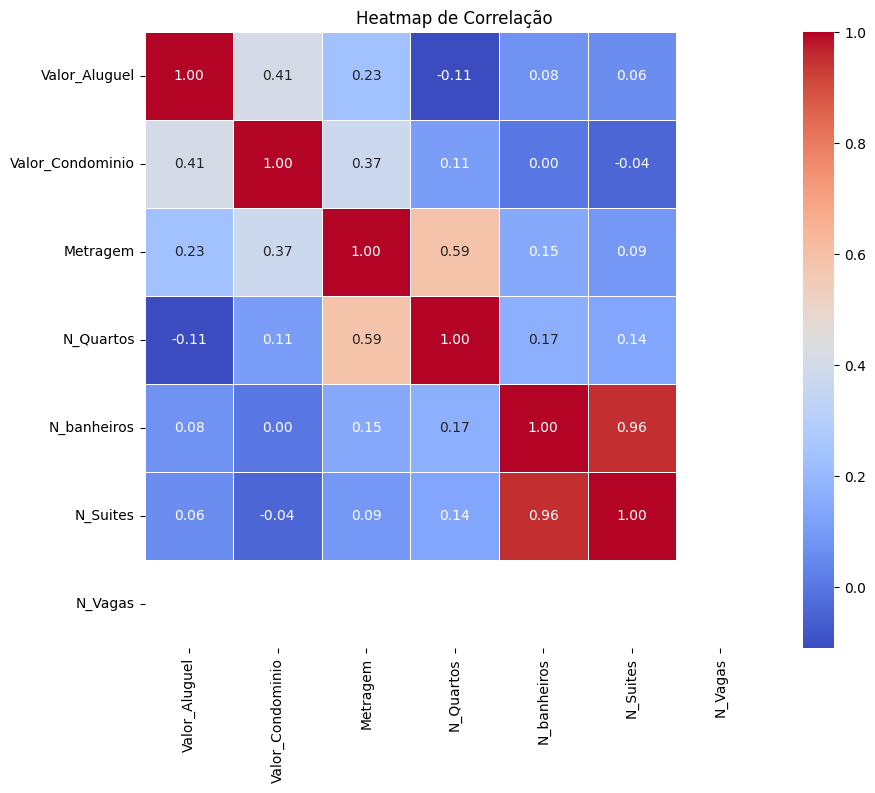

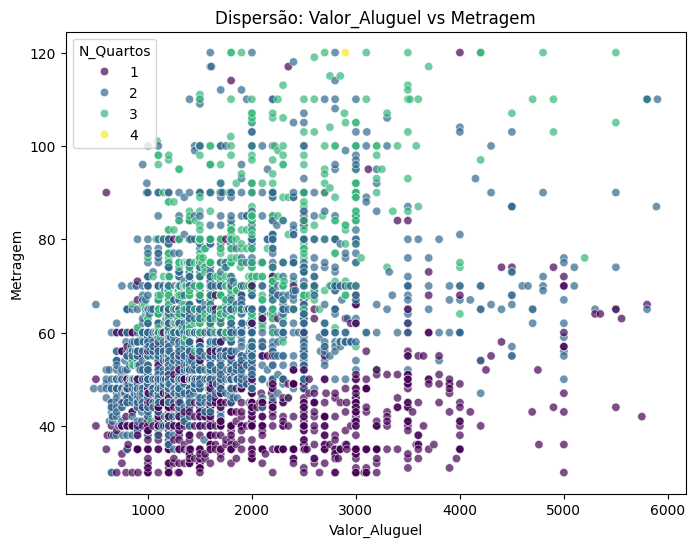

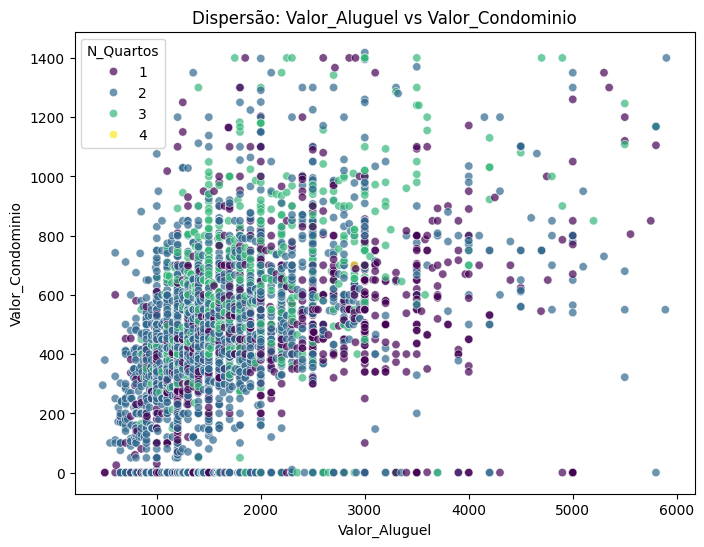

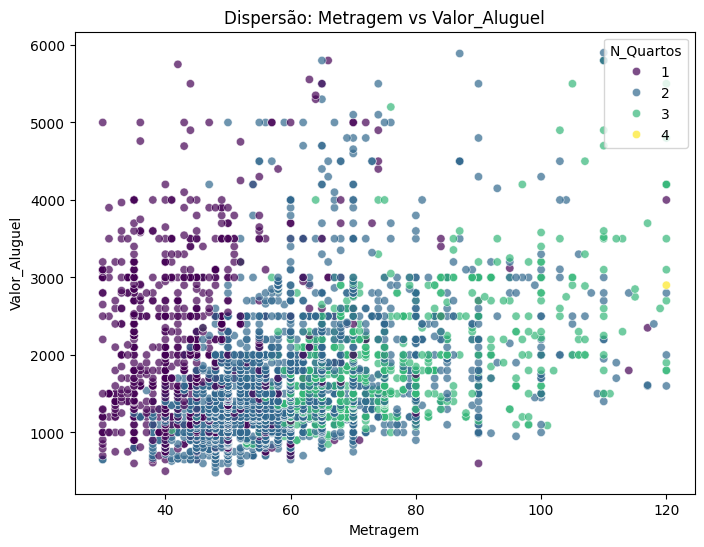

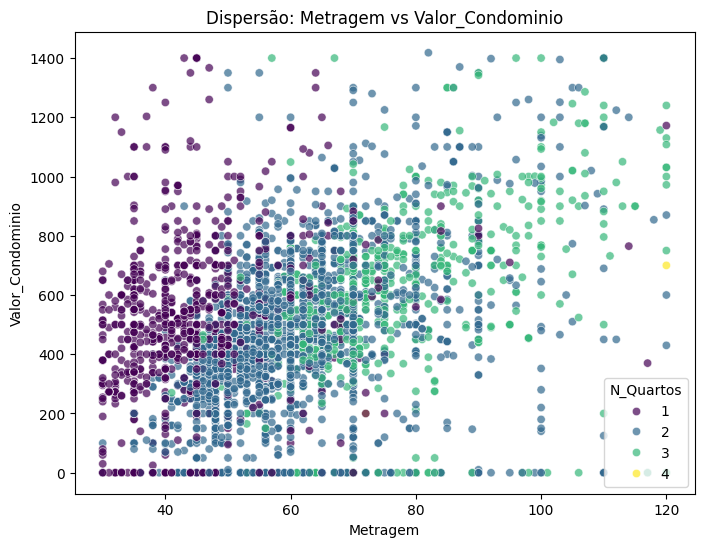

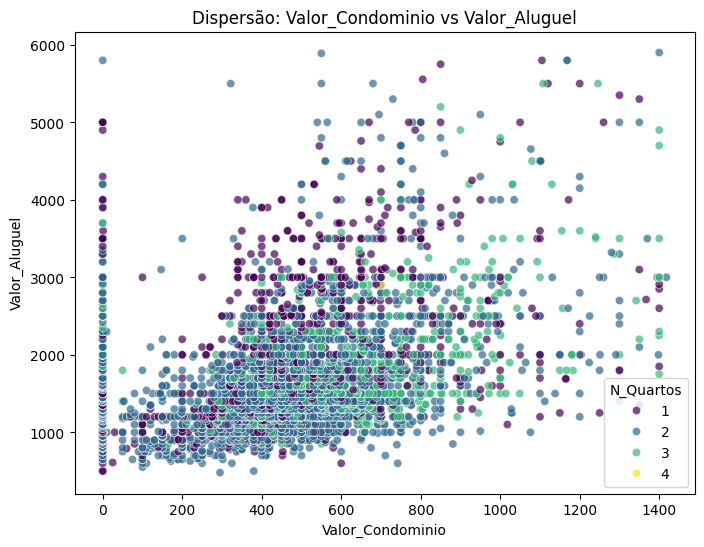

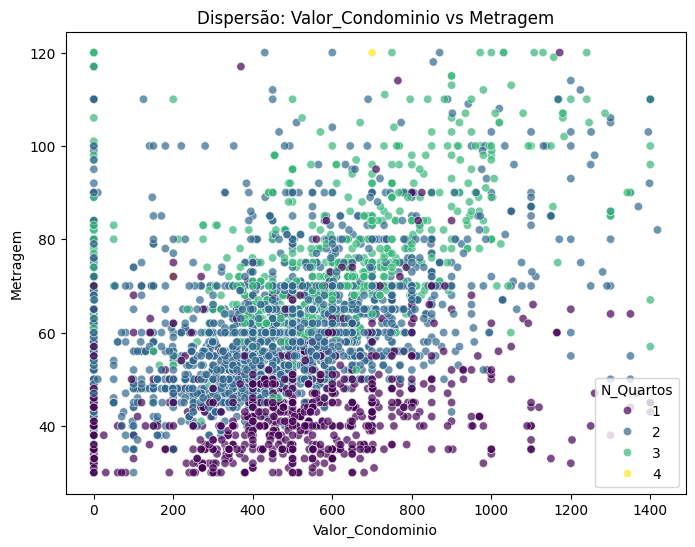

<ipython-input-25-bfc55b1450dc>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpo, x='N_Quartos', y='Valor_Aluguel', palette='Set2')


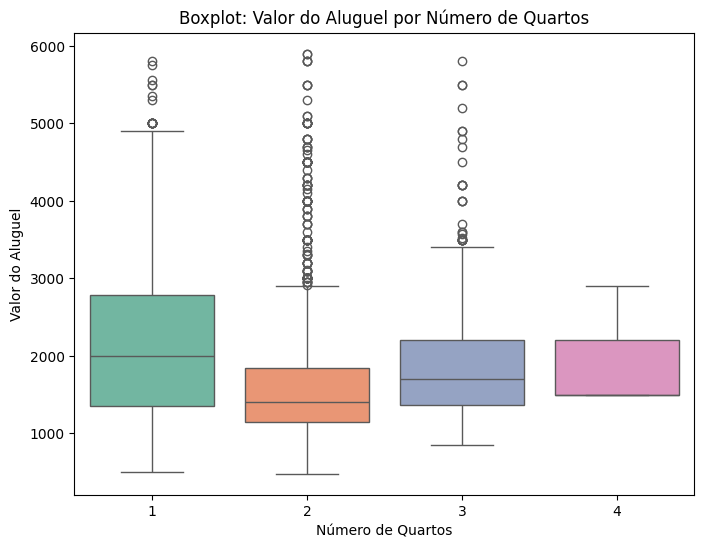

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

#Ficou constante
df_limpo['N_Vagas'].value_counts()


# 1. Matriz de Correlação
correlacao = df_limpo.corr()
print("Matriz de Correlação:\n", correlacao)

# Heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlação")
plt.show()

# 2. Gráficos de Dispersão (scatter plots)
variaveis_interesse = ['Valor_Aluguel', 'Metragem', 'Valor_Condominio']

for var1 in variaveis_interesse:
    for var2 in variaveis_interesse:
        if var1 != var2:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(data=df_limpo, x=var1, y=var2, hue='N_Quartos', palette='viridis', alpha=0.7)
            plt.title(f"Dispersão: {var1} vs {var2}")
            plt.xlabel(var1)
            plt.ylabel(var2)
            plt.show()

# 3. Boxplots (exemplo com 'Valor_Aluguel' categorizado por 'N_Quartos')
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_limpo, x='N_Quartos', y='Valor_Aluguel', palette='Set2')
plt.title("Boxplot: Valor do Aluguel por Número de Quartos")
plt.xlabel("Número de Quartos")
plt.ylabel("Valor do Aluguel")
plt.show()


### Insights Baseados nos Gráficos

#### 1. Heatmap de Correlação

- **Quartos e Valor do Aluguel (-0.11):**  
  A correlação negativa sugere que mais quartos podem estar associados a aluguéis levemente mais baratos. Isso pode ocorrer porque unidades menores com menos quartos estão localizadas em áreas mais caras (ou são mais luxuosas), como estúdios ou apartamentos compactos.

- **Quartos e Metragem (0.59):**  
  A correlação positiva forte entre quartos e metragem faz sentido, pois mais quartos geralmente exigem mais espaço, ou seja, uma metragem maior.

- **Condomínio e Aluguel (0.41):**  
  A correlação positiva entre o valor do aluguel e o valor do condomínio indica que imóveis com aluguéis mais altos tendem a ter taxas de condomínio mais caras. Isso pode refletir que imóveis em áreas de alto padrão ou com melhores serviços possuem custos elevados em ambas as frentes.

- **Metragem e Condomínio (0.37):**  
  Imóveis maiores geralmente possuem custos de manutenção e condomínio mais altos, o que justifica a correlação moderada positiva entre metragem e valor de condomínio.

- **Suítes e Banheiros (0.96):**  
  A relação quase perfeita entre suítes e banheiros sugere que a maioria dos banheiros são suítes. Ou seja, para cada quarto adicional, provavelmente há um banheiro associado, o que é um padrão comum em imóveis modernos.

- **Correlação Próxima de Zero:**  
  As demais combinações apresentam valores próximos de zero, indicando que não há uma relação linear significativa entre essas variáveis.

#### 2. Gráficos de Dispersão

- **Aluguel x Condomínio:**  
  O número de quartos não apresenta um padrão claro. Isso sugere que, independentemente do número de quartos, o custo do condomínio e o valor do aluguel não estão diretamente relacionados a essa variável.

- **Metragem x Aluguel:**  
  A relação entre metragem e aluguel é mais evidente. Conforme a metragem aumenta, o número de quartos também tende a aumentar, o que reforça a correlação positiva entre metragem e número de quartos.

#### 3. Boxplot: Valor do Aluguel por Número de Quartos

- **1 a 3 Quartos:**  
  A dispersão nos valores de aluguel é maior. Para imóveis com 1 a 3 quartos, existem opções com ampla variação, sugerindo que outros fatores, como localização e idade do imóvel, podem influenciar mais o valor do aluguel.

- **4 Quartos:**  
  Para imóveis com 4 quartos, os valores de aluguel se tornam mais concentrados, variando entre R$1500 e R$3000. Isso sugere que imóveis maiores têm uma faixa de preço mais previsível e menos dispersa.

- **Comparação 1 Quarto x 2 Quartos:**  
  Surpreendentemente, imóveis com 2 quartos tendem a ser mais baratos do que os de 1 quarto, em média. Isso pode refletir que unidades de 1 quarto são procuradas por um público específico (jovens, solteiros, casais) e, por isso, são mais valorizadas em determinadas regiões.

### Resumo:

- A metragem tem uma relação forte com o número de quartos, o que é intuitivo.
- Banheiros estão quase sempre vinculados a suítes, evidenciando um foco no conforto dos quartos.
- A dispersão nos aluguéis para imóveis com até 3 quartos reflete uma diversidade no mercado, enquanto imóveis maiores apresentam preços mais estáveis.
- Curiosamente, imóveis de 1 quarto tendem a ter valores mais altos, em média, do que os de 2 quartos. Esse comportamento pode ser explorado como uma particularidade do mercado em certas regiões ou para públicos específicos.


# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




Matriz de Correlação:
                   Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  \
Valor_Aluguel          1.000000          0.406096  0.234928  -0.110517   
Valor_Condominio       0.406096          1.000000  0.372720   0.109519   
Metragem               0.234928          0.372720  1.000000   0.588277   
N_Quartos             -0.110517          0.109519  0.588277   1.000000   
N_banheiros            0.075428          0.001277  0.147058   0.167410   
N_Suites               0.061473         -0.042534  0.090312   0.136294   
N_Vagas                     NaN               NaN       NaN        NaN   

                  N_banheiros  N_Suites  N_Vagas  
Valor_Aluguel        0.075428  0.061473      NaN  
Valor_Condominio     0.001277 -0.042534      NaN  
Metragem             0.147058  0.090312      NaN  
N_Quartos            0.167410  0.136294      NaN  
N_banheiros          1.000000  0.955647      NaN  
N_Suites             0.955647  1.000000      NaN  
N_Vagas                   N

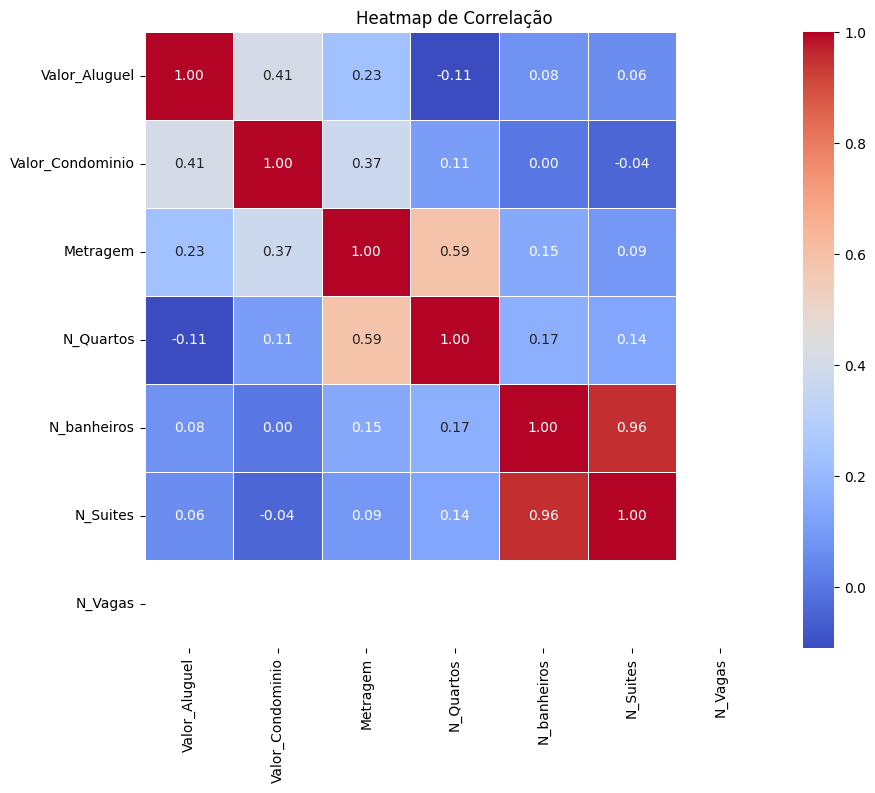

In [26]:
# Calcular a correlação entre as variáveis
correlacao = df_limpo.corr()

# Exibir a matriz de correlação
print("Matriz de Correlação:\n", correlacao)

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlação")
plt.show()


### Análise de Correlação

#### Correlação Forte (acima de 0.7 ou abaixo de -0.7):

- **N_Quartos e Metragem (0.59):**  
  Existe uma correlação moderada entre o número de quartos e a metragem do imóvel. Isso indica que, quanto maior a metragem de um imóvel, mais quartos ele tende a ter.

- **Valor_Aluguel e Valor_Condominio (0.41):**  
  A correlação de 0.41 sugere uma relação positiva moderada entre o valor do aluguel e o valor do condomínio. Em outras palavras, imóveis com maior valor de aluguel tendem a ter valores de condomínio mais altos.

- **N_banheiros e N_Suites (0.96):**  
  A correlação extremamente alta de 0.96 indica que a grande maioria dos imóveis com banheiros também possui suítes. Isso é esperado, pois muitos imóveis modernos têm quartos transformados em suítes, o que explica essa correlação quase perfeita.



B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [30]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [31]:
# Dividindo em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibindo o tamanho das divisões
print(f"Tamanho do conjunto de treino: {X_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

Tamanho do conjunto de treino: 5762
Tamanho do conjunto de teste: 1441


# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [40]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [41]:
# Criando o modelo de Regressão Linear
modelo = LinearRegression()

# Treinando o modelo
modelo.fit(X, y)

# Fazendo previsões com o modelo treinado
y_pred = modelo.predict(X)

# Avaliando o modelo
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)


B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [42]:

# Exibindo os coeficientes, erro quadrático médio (MSE) e R²
print(f"Coeficiente (Inclinação) da reta: {modelo.coef_[0]}")
print(f"Intercepto da reta: {modelo.intercept_}")


Coeficiente (Inclinação) da reta: 34.47397089324867
Intercepto da reta: -96.99896039931718


### Equação do Modelo de Regressão Linear Simples

A equação do modelo de regressão linear simples que utilizamos para prever o **Valor do Aluguel** com base na **Metragem** é:

$$
\text{Valor do Aluguel} = 34.47 \times \text{Metragem} - 96.99
$$


c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [43]:
# Exibindo os coeficientes, erro quadrático médio (MSE) e R²
print(f"Coeficiente (Inclinação) da reta: {modelo.coef_[0]}")
print(f"Intercepto da reta: {modelo.intercept_}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"R²: {r2}")


Coeficiente (Inclinação) da reta: 34.47397089324867
Intercepto da reta: -96.99896039931718
Erro Quadrático Médio (MSE): 3903197.6007950227
R²: 0.521363231851778


### Avaliação do R² no Modelo de Treinamento

O **R²** do modelo de treinamento foi de **0.5214**, ou **52.14%**. Isso significa que o modelo é capaz de explicar cerca de 52% da variação do **Valor do Aluguel** com base apenas na **Metragem**. Este valor de R² indica que o modelo tem um ajuste moderado aos dados, mas há espaço para melhorias.

#### Avaliação do R²:
Para problemas simples e com uma única variável independente, um R² de 0.52 não é péssimo, mas também não é excelente. Em modelos de regressão mais avançados ou com mais variáveis preditoras, espera-se que o R² seja mais alto.

O modelo está explicando metade da variabilidade do **Valor do Aluguel**. No entanto, os outros 48% da variação não são explicados pela **Metragem**, sugerindo que outras variáveis podem influenciar significativamente o **Valor do Aluguel** e devem ser incluídas para melhorar o modelo.


D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

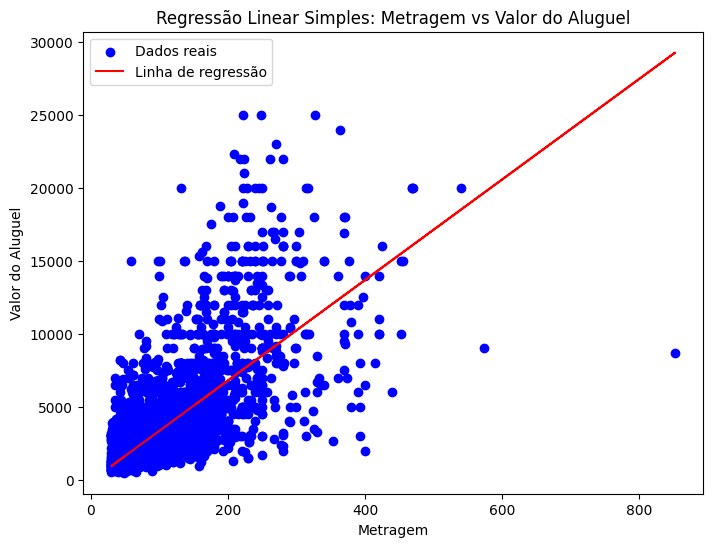

In [44]:

# Visualizando o gráfico de dispersão com a linha de regressão
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, y_pred, color='red', label='Linha de regressão')
plt.title('Regressão Linear Simples: Metragem vs Valor do Aluguel')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.legend()
plt.show()

### Insights sobre o gráfico e dispersão dos pontos

- **Dispersão dos pontos**: A dispersão dos pontos ao longo da reta de regressão parece ser razoável. No entanto, é visível que existem alguns pontos afastados da reta, o que é esperado em um modelo simples. Isso indica que outros fatores além da Metragem provavelmente influenciam o Valor do Aluguel.

- **Comportamento da reta**: A reta se inclina positivamente, o que é esperado, pois metragem maior tende a resultar em valor de aluguel mais alto. A inclinação da reta sugere que a relação entre metragem e valor de aluguel é linear, mas não é perfeita, pois a dispersão não é zero (há variação dos pontos ao redor da reta).

- **Análise de Tendência**: De fato, como mencionado, a reta mostra que, à medida que a metragem aumenta, o valor de aluguel também aumenta, o que é uma tendência natural do mercado imobiliário. No entanto, a dispersão dos dados ao redor da reta sugere que outros fatores, como localização, condições do imóvel, entre outros, também influenciam o valor do aluguel.


E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [45]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [46]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = modelo.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = modelo.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.5697993791211697


### Explicação do Coeficiente de Determinação (R²)

Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está **superajustado** aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está **subajustado**. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse **consistente** entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.


F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

### Explicação do Resultado:
O R² nos dados de teste foi de 0.5698, ou 56.98%, o que é um pouco melhor que o R² nos dados de treinamento (52.14%). Isso sugere que o modelo pode estar generalizando bem para novos dados, o que é uma boa notícia. A diferença entre os R² de treinamento e teste não é muito grande, o que indica que o modelo não está overfitting (ou seja, não está ajustado demais aos dados de treinamento, o que seria um problema).

### Insight:
**Desempenho nos dados de teste:** O modelo está performando de forma razoável nos dados de teste, com cerca de 57% da variabilidade do Valor do Aluguel sendo explicada pela Metragem. Embora isso não seja um valor excelente, é um bom começo, principalmente para um modelo simples com apenas uma variável.

**Generalização:** A leve melhoria no R² no teste sugere que o modelo é capaz de se adaptar aos novos dados, sem se ajustar excessivamente aos dados de treinamento.


# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [47]:
# Separando as variáveis independentes (X) e dependente (y)
X = df.drop('Valor_Aluguel', axis=1)  # Excluindo a variável 'Valor_Aluguel'
y = df['Valor_Aluguel']  # A variável dependente

# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo de regressão linear múltipla
modelo_multiplo = LinearRegression()
modelo_multiplo.fit(X_train, y_train)

# Coeficientes do modelo
print("Coeficientes:", modelo_multiplo.coef_)
print("Intercepto:", modelo_multiplo.intercept_)

Coeficientes: [   0.78400678   20.68135689 -649.12188657  223.71153486  340.33788484
  501.24631769]
Intercepto: 435.29273156066256


B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [48]:
# Realizando as previsões no conjunto de treino
y_pred_multiplo_treino = modelo_multiplo.predict(X_train)

# Calculando o erro quadrático médio (MSE) e R²
mse_multiplo_treino = mean_squared_error(y_train, y_pred_multiplo_treino)
r2_multiplo_treino = r2_score(y_train, y_pred_multiplo_treino)



C) Traga o valor do R quadrado e avalie o valor encontrado.


In [49]:
# Exibindo os resultados para a base de treino
print(f"Erro Quadrático Médio (MSE) da Regressão Múltipla (treino): {mse_multiplo_treino}")
print(f"Coeficiente de Determinação (R²) da Regressão Múltipla (treino): {r2_multiplo_treino}")

Erro Quadrático Médio (MSE) da Regressão Múltipla (treino): 3296157.9866031157
Coeficiente de Determinação (R²) da Regressão Múltipla (treino): 0.5958025784571297


### Análise do R² e MSE

O R² de 0.5958 na base de treino indica que o modelo de regressão múltipla é capaz de explicar cerca de 59,6% da variabilidade do valor do aluguel com base nas variáveis independentes selecionadas. Este é um bom valor, pois geralmente, um R² superior a 0.5 já é considerado razoável para modelos preditivos, dependendo do contexto e dos dados.

O Erro Quadrático Médio (MSE) de 3.296.157,99 indica a magnitude do erro quadrático médio entre as previsões e os valores reais. Um valor mais baixo é desejável, mas, isoladamente, esse número não pode ser avaliado sem um contexto específico. Compará-lo com o MSE da regressão simples pode ajudar a entender a melhoria.


D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [50]:
# Realizando as previsões na base de teste
y_pred_multiplo_teste = modelo_multiplo.predict(X_test)

# Calculando o R² para os dados de teste
r2_multiplo_teste = r2_score(y_test, y_pred_multiplo_teste)

# Exibindo o R² de teste
print(f"Coeficiente de Determinação (R²) da Regressão Múltipla (teste): {r2_multiplo_teste}")

Coeficiente de Determinação (R²) da Regressão Múltipla (teste): 0.6400782589585374


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

### Análise do R²

O R² de 0.6401 na base de teste é ainda mais promissor. Ele sugere que, ao aplicar o modelo em dados que não foram usados para treinamento, o modelo é capaz de explicar 64% da variabilidade do valor do aluguel, o que é um bom desempenho. Isso indica que o modelo tem uma boa capacidade de generalização e não está apenas "decorando" os dados de treino.

---

### Comparação dos R² dos Modelos

**Regressão Linear Simples (Metragem):**
- O R² da regressão simples (utilizando apenas a metragem) foi de 0.5214 para os dados de treino e de 0.5698 para os dados de teste.

**Regressão Linear Múltipla (todas as variáveis):**
- O R² para os dados de treino foi de 0.5958, e para os dados de teste foi 0.6401.

---

### Análise Comparativa

**R² de Treinamento:**
- O modelo de regressão múltipla teve um R² de treino mais alto (0.5958) em comparação com a regressão linear simples (0.5214). Isso indica que, com várias variáveis, o modelo é mais capaz de capturar a variabilidade no valor do aluguel, o que é esperado, já que ele utiliza mais informações (como o número de quartos, o valor do condomínio, etc.) para fazer previsões.

**R² de Teste:**
- Para a base de teste, o modelo de regressão múltipla também se saiu melhor (0.6401) em comparação com a regressão simples (0.5698). Isso reforça que a inclusão de múltiplas variáveis torna o modelo mais robusto e capaz de generalizar melhor para novos dados.

---

### Conclusões

- O modelo de regressão múltipla apresenta um R² maior tanto para os dados de treino quanto para os dados de teste, o que indica que ele tem um desempenho superior em relação à regressão simples.
- A múltipla consegue explicar mais da variabilidade do valor do aluguel ao utilizar mais variáveis como a metragem, número de quartos, e o valor do condomínio.
- A melhoria no R² de teste (passando de 0.5698 para 0.6401) sugere que o modelo de regressão múltipla tem uma boa capacidade de generalização, o que é um indicativo de que ele está capturando relações mais complexas nos dados.
